In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

In [3]:
# Define keys

consumer_key = '###################'
consumer_secret = '#################'
access_token = '########################'
access_token_secret = '#######################'

In [4]:
# Authenticate

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [5]:
# Search for tweets

## New Search Criteria - Work ##Tweets

new_search = '#plumbing - filter:retweets'

##['#plumbing', '#plumber','#SharkBitePlumbing', ' #SharkBiteFittings',
##'#hvac', ' #contractor', ' #skilledtrades', ' #PEXpipe', ' #newconstruction']

date_since = '2019-06-01'

tweets = tw.Cursor(api.search,
                  q = new_search,
                  lang = 'en',
                  since = date_since).items(1000)

all_tweets = [tweet.text for tweet in tweets]

In [10]:
all_tweets[:5]

['RT @LinkedSupplyLS: Looking For A Kit Or Two !!!!! \n\nClick On This Link https://t.co/FoVQLWlh0m #tweetuk\n\n#Engineer #Engineering #hydraulic…',
 'RT @amyhayesYC: Another productive employer meeting this morning. Discussing #plumbing #apprenticeships with @qj_hull 👍Looking forward to w…',
 'RT @hartlepoolfe: JOB OPPORTUNITIES \nAs our successful academic year comes to an end we start planning for the next. Our team is growing, c…',
 'RT @comphydraulic: Take a look at our new shop \n\nClick this link  to see whats in store \n\nhttps://t.co/PG2By62Fsc\n\n#CompletelyHydraulic #On…',
 'RT @LinkedSupplyLS: #ORing Kit High Grade #RubberORing Kit In Metric Sizes.\n\nSee our shop &gt;  https://t.co/FoVQLWlh0m\n\n#Tools #DIY #Plumbing…']

In [8]:
## Remove URLs

def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """
        
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)","",txt).split())

In [13]:
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]

['RT LinkedSupplyLS Looking For A Kit Or Two Click On This Link tweetukEngineer Engineering hydraulic',
 'RT amyhayesYC Another productive employer meeting this morning Discussing plumbing apprenticeships with qjhull Looking forward to w',
 'RT hartlepoolfe JOB OPPORTUNITIES As our successful academic year comes to an end we start planning for the next Our team is growing c',
 'RT comphydraulic Take a look at our new shop Click this link to see whats in store CompletelyHydraulic On',
 'RT LinkedSupplyLS ORing Kit High Grade RubberORing Kit In Metric SizesSee our shop gt Tools DIY Plumbing']

In [14]:
## Text clean up - address case issue

# Note how capitalization impacts unique returned values

ex_list = ['Dog', 'dog', 'cat', 'Cat']

# Get unique elements in the list

set(ex_list)

{'Cat', 'Dog', 'cat', 'dog'}

In [15]:
# Note how capitlization impacts unique returned values

words_list = ['Dog','dog','Cat','cat',',']

# Make elements in the list lower case
lower_case = [word.lower() for word in words_list]

lower_case

['dog', 'dog', 'cat', 'cat', ',']

In [16]:
set(lower_case)

{',', 'cat', 'dog'}

In [17]:
# Create list of lower case words from tweets

all_tweets_no_urls[0].split()

['RT',
 'LinkedSupplyLS',
 'Looking',
 'For',
 'A',
 'Kit',
 'Or',
 'Two',
 'Click',
 'On',
 'This',
 'Link',
 'tweetukEngineer',
 'Engineering',
 'hydraulic']

In [19]:
# convert to lower case and split at the same time
all_tweets_no_urls[0].lower().split()

['rt',
 'linkedsupplyls',
 'looking',
 'for',
 'a',
 'kit',
 'or',
 'two',
 'click',
 'on',
 'this',
 'link',
 'tweetukengineer',
 'engineering',
 'hydraulic']

In [21]:
## Create a list of lists containing lowercase words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]

[['rt',
  'linkedsupplyls',
  'looking',
  'for',
  'a',
  'kit',
  'or',
  'two',
  'click',
  'on',
  'this',
  'link',
  'tweetukengineer',
  'engineering',
  'hydraulic'],
 ['rt',
  'amyhayesyc',
  'another',
  'productive',
  'employer',
  'meeting',
  'this',
  'morning',
  'discussing',
  'plumbing',
  'apprenticeships',
  'with',
  'qjhull',
  'looking',
  'forward',
  'to',
  'w']]

In [22]:
## Calculate and plot work frequency

# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

In [24]:
counts_no_urls.most_common(10)

[('rt', 669),
 ('plumbing', 326),
 ('the', 323),
 ('in', 250),
 ('to', 228),
 ('a', 217),
 ('and', 196),
 ('our', 194),
 ('of', 176),
 ('for', 152)]

In [29]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(30), columns=['words','count'])

In [30]:
clean_tweets_no_urls.head()

,words,count
0,rt,669
1,plumbing,326
2,the,323
3,in,250
4,to,228


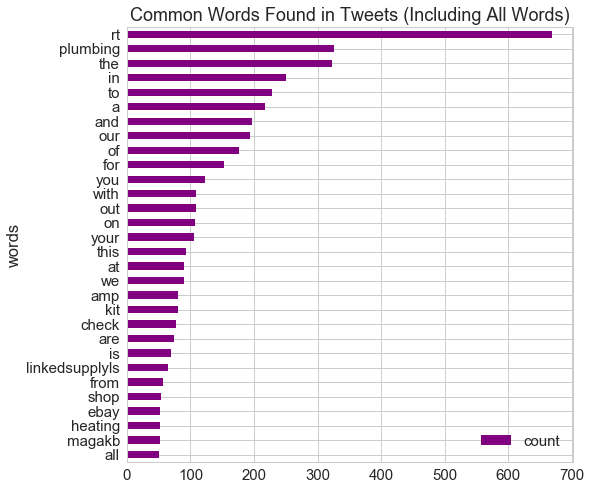

In [31]:
# horizontal bar graph
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

In [32]:
## Remove stopwords with nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ponshp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [33]:
stop_words = set(stopwords.words('english'))

In [34]:
list(stop_words)[0:10]

['it', 'an', "it's", 'until', 'won', 'a', 'he', 'yourself', 'here', 'that']

In [35]:
words_in_tweet[0]

['rt',
 'linkedsupplyls',
 'looking',
 'for',
 'a',
 'kit',
 'or',
 'two',
 'click',
 'on',
 'this',
 'link',
 'tweetukengineer',
 'engineering',
 'hydraulic']

In [39]:
# remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
             for tweet_words in words_in_tweet]

In [40]:
tweets_nsw[0]

['rt',
 'linkedsupplyls',
 'looking',
 'kit',
 'two',
 'click',
 'link',
 'tweetukengineer',
 'engineering',
 'hydraulic']

In [41]:
all_words_nsw = list(itertools.chain(*tweets_nsw))
counts_nsw = collections.Counter(all_words_nsw)
counts_nsw.most_common(15)

[('rt', 669),
 ('plumbing', 326),
 ('amp', 81),
 ('kit', 80),
 ('check', 77),
 ('linkedsupplyls', 64),
 ('shop', 53),
 ('heating', 52),
 ('magakb', 52),
 ('ebay', 52),
 ('new', 50),
 ('diy', 48),
 ('plumber', 48),
 ('need', 48),
 ('looking', 46)]

In [42]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                               columns = ['words', 'count'])

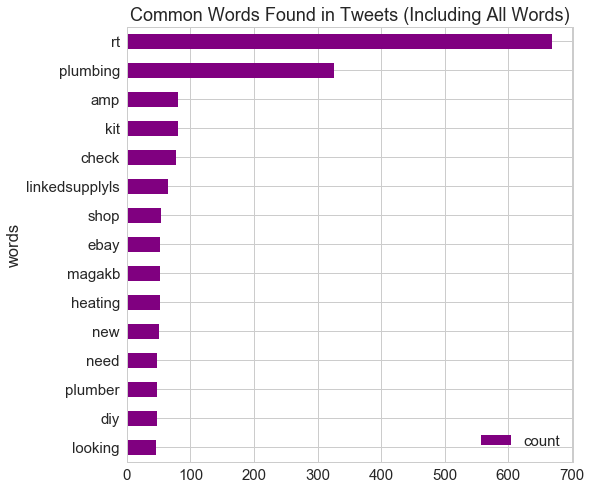

In [43]:
# horizontal bar graph
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

In [44]:
# Remove collection words

collection_words = ['plumbing', 'rt']

tweets_nsw_nc = [[w for w in word if not w in collection_words]
                for word in tweets_nsw]

In [45]:
# Flattern list of words in clean tweets

all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))

# create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

In [46]:
counts_nsw_nc.most_common(15)

[('amp', 81),
 ('kit', 80),
 ('check', 77),
 ('linkedsupplyls', 64),
 ('shop', 53),
 ('heating', 52),
 ('magakb', 52),
 ('ebay', 52),
 ('new', 50),
 ('diy', 48),
 ('plumber', 48),
 ('need', 48),
 ('looking', 46),
 ('tools', 45),
 ('plumbanddone', 44)]

In [47]:
len(counts_nsw_nc)

2225

In [48]:
clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(15),
                               columns = ['words','count'])

clean_tweets_ncw.head()

,words,count
0,amp,81
1,kit,80
2,check,77
3,linkedsupplyls,64
4,shop,53


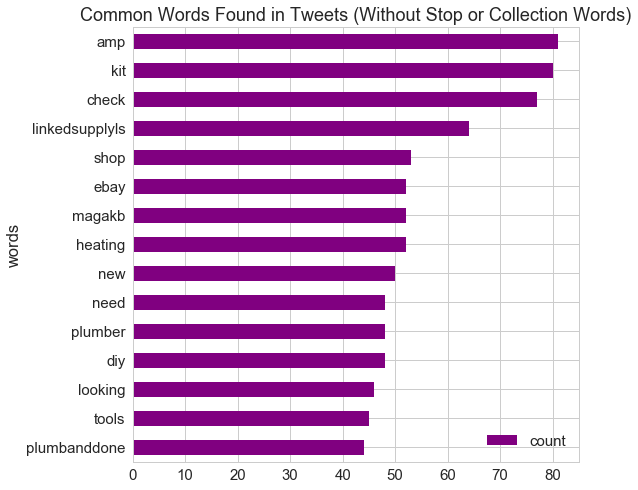

In [50]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop or Collection Words)")

plt.show()